In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
train_dataset_path = '/content/drive/MyDrive/Dataset/Test'
test_dataset_path = '/content/drive/MyDrive/TestDataset/Train'
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 2390 images belonging to 5 classes.
Found 452 images belonging to 5 classes.


Epoch 1/10
75/75 [==============================] - 756s 10s/step - loss: 1.4217 - accuracy: 0.3983 - val_loss: 1.1611 - val_accuracy: 0.5022
Epoch 2/10
75/75 [==============================] - 118s 2s/step - loss: 1.1251 - accuracy: 0.5494 - val_loss: 0.9995 - val_accuracy: 0.6084
Epoch 3/10
75/75 [==============================] - 118s 2s/step - loss: 0.9652 - accuracy: 0.6205 - val_loss: 0.7880 - val_accuracy: 0.6814
Epoch 4/10
75/75 [==============================] - 118s 2s/step - loss: 0.8098 - accuracy: 0.6895 - val_loss: 0.7101 - val_accuracy: 0.7389
Epoch 5/10
75/75 [==============================] - 119s 2s/step - loss: 0.6927 - accuracy: 0.7372 - val_loss: 0.5360 - val_accuracy: 0.8053
Epoch 6/10
75/75 [==============================] - 117s 2s/step - loss: 0.5202 - accuracy: 0.8084 - val_loss: 0.4420 - val_accuracy: 0.8429
Epoch 7/10
75/75 [==============================] - 113s 2s/step - loss: 0.3834 - accuracy: 0.8594 - val_loss: 0.3431 - val_accuracy: 0.8562
Epoch 8/10
7

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


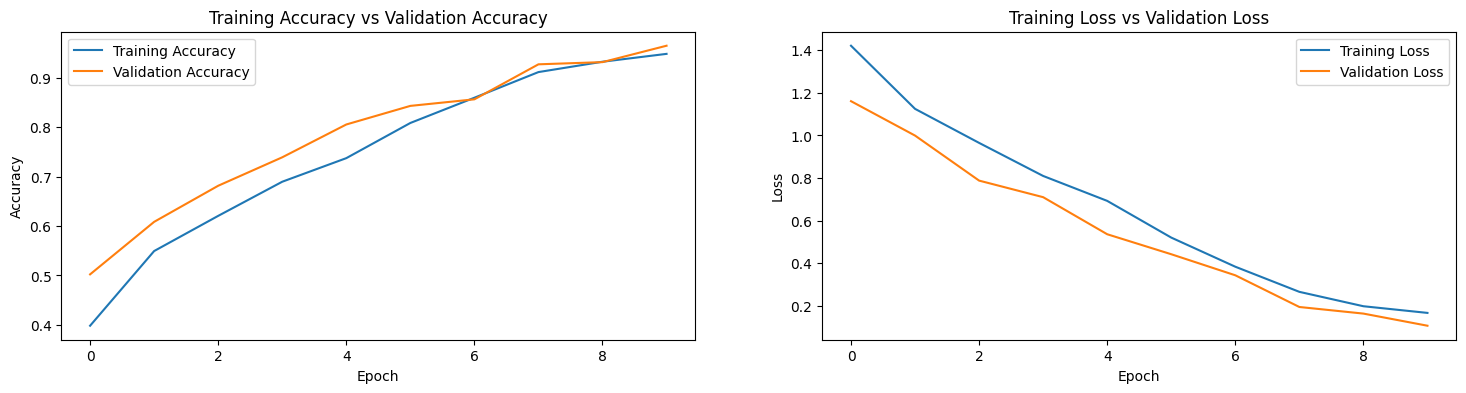

1/1 [==============================] - 1s 695ms/step


<Figure size 800x800 with 0 Axes>

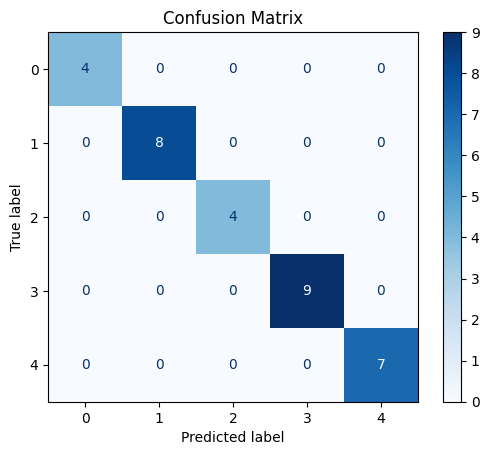

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
model.save('Waste_Classification_Model.h5')
plt.figure(figsize=(18, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.savefig('Graph.svg')
plt.show()
test_data, true_labels = next(test_generator)
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(np.argmax(true_labels, axis=1), predicted_labels)
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(5))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix.svg')
plt.show()

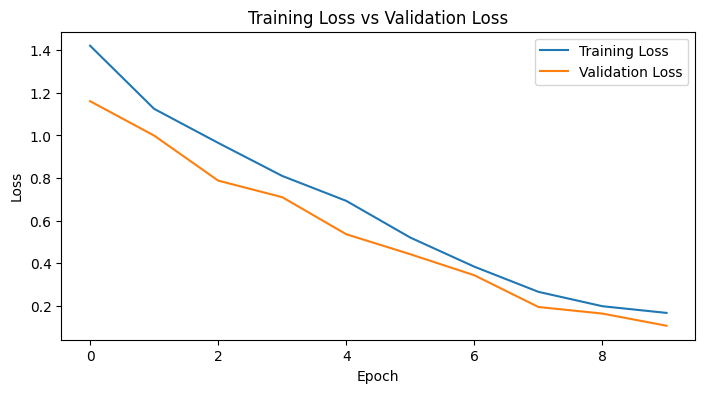

In [ ]:
plt.figure(figsize=(18, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.savefig('Training VS Valiation Loss.svg')
plt.show()


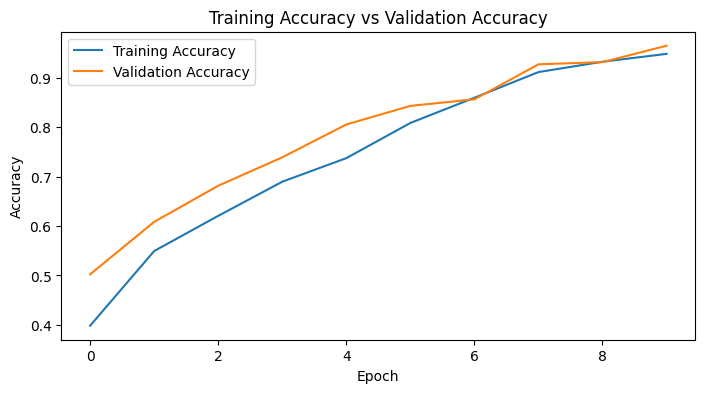

In [ ]:
plt.figure(figsize=(18, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.savefig('Training accuracy VS Valiation accuracy.svg')
plt.show()

Found 2390 images belonging to 5 classes.
Found 452 images belonging to 5 classes.
Epoch 1/10
1/1 [==============================] - 1s 695ms/step
Epoch 1 - Val F1 Score: 0.6012
75/75 [==============================] - 124s 2s/step - loss: 1.4078 - accuracy: 0.3812 - val_loss: 1.1207 - val_accuracy: 0.5553
Epoch 2/10
1/1 [==============================] - 1s 610ms/step
Epoch 2 - Val F1 Score: 0.7128
75/75 [==============================] - 123s 2s/step - loss: 1.0980 - accuracy: 0.5469 - val_loss: 0.9685 - val_accuracy: 0.5973
Epoch 3/10
1/1 [==============================] - 0s 360ms/step
Epoch 3 - Val F1 Score: 0.6456
75/75 [==============================] - 121s 2s/step - loss: 0.9415 - accuracy: 0.6331 - val_loss: 0.7045 - val_accuracy: 0.7013
Epoch 4/10
1/1 [==============================] - 0s 340ms/step
Epoch 4 - Val F1 Score: 0.6915
75/75 [==============================] - 120s 2s/step - loss: 0.7571 - accuracy: 0.7159 - val_loss: 0.6000 - val_accuracy: 0.7920
Epoch 5/10
1/1 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


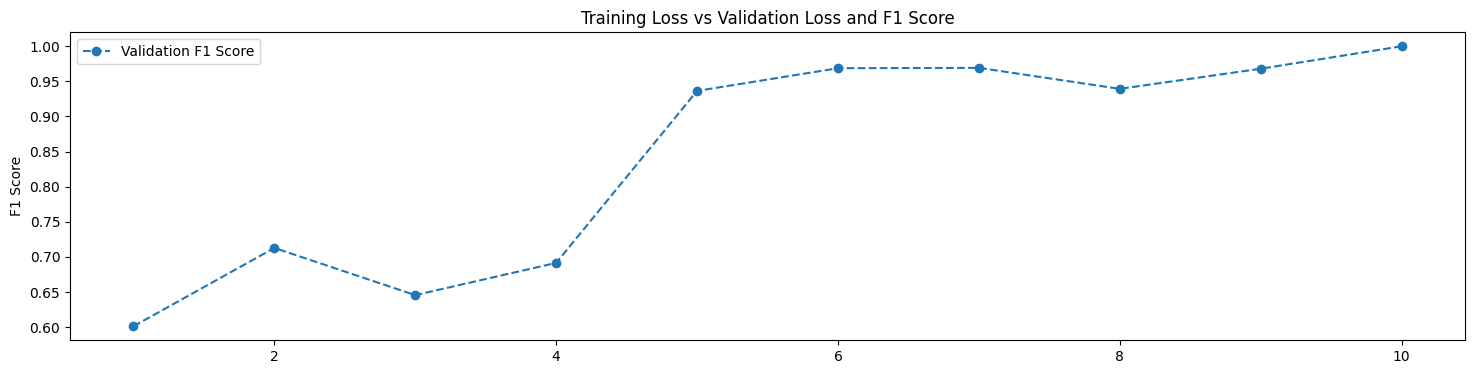

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

train_dataset_path = '/content/drive/MyDrive/Dataset/Train'
test_dataset_path = '/content/drive/MyDrive/Dataset/Test'

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

class F1Callback(keras.callbacks.Callback):
    def __init__(self, validation_generator):
        self.validation_generator = validation_generator
        self.val_f1_scores = []

    def on_epoch_end(self, epoch, logs=None):
        val_images, val_labels = self.validation_generator.next()
        val_preds = self.model.predict(val_images)
        val_preds = tf.argmax(val_preds, axis=1)
        val_true = tf.argmax(val_labels, axis=1)
        val_f1 = f1_score(val_true, val_preds, average='weighted')
        self.val_f1_scores.append(val_f1)
        print(f'Epoch {epoch + 1} - Val F1 Score: {val_f1:.4f}')

# Use F1Callback during training
f1_callback = F1Callback(validation_generator=test_generator)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[f1_callback]
)

model.save('Model.h5')

plt.figure(figsize=(18, 4))
plt.plot(range(1, 11), f1_callback.val_f1_scores, label='Validation F1 Score', linestyle='--', marker='o')
plt.ylabel('F1 Score')
plt.title('Training Loss vs Validation Loss and F1 Score')
plt.legend()
plt.savefig('Graph.svg')
plt.show()


Found 2390 images belonging to 5 classes.
Found 452 images belonging to 5 classes.
Epoch 1/10
1/1 [==============================] - 1s 526ms/step
Epoch 1 - Val F1 Score: 0.4686, Precision: 0.5974, Recall: 0.5000, Accuracy: 0.5332
75/75 [==============================] - 362s 5s/step - loss: 1.4056 - accuracy: 0.3975 - val_loss: 1.1171 - val_accuracy: 0.5332
Epoch 2/10
1/1 [==============================] - 0s 356ms/step
Epoch 2 - Val F1 Score: 0.6241, Precision: 0.6927, Recall: 0.6250, Accuracy: 0.6350
75/75 [==============================] - 132s 2s/step - loss: 1.1108 - accuracy: 0.5586 - val_loss: 0.8698 - val_accuracy: 0.6350
Epoch 3/10
1/1 [==============================] - 0s 386ms/step
Epoch 3 - Val F1 Score: 0.8241, Precision: 0.8594, Recall: 0.8125, Accuracy: 0.7102
75/75 [==============================] - 134s 2s/step - loss: 0.9575 - accuracy: 0.6213 - val_loss: 0.7580 - val_accuracy: 0.7102
Epoch 4/10
1/1 [==============================] - 0s 379ms/step
Epoch 4 - Val F1 Sc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


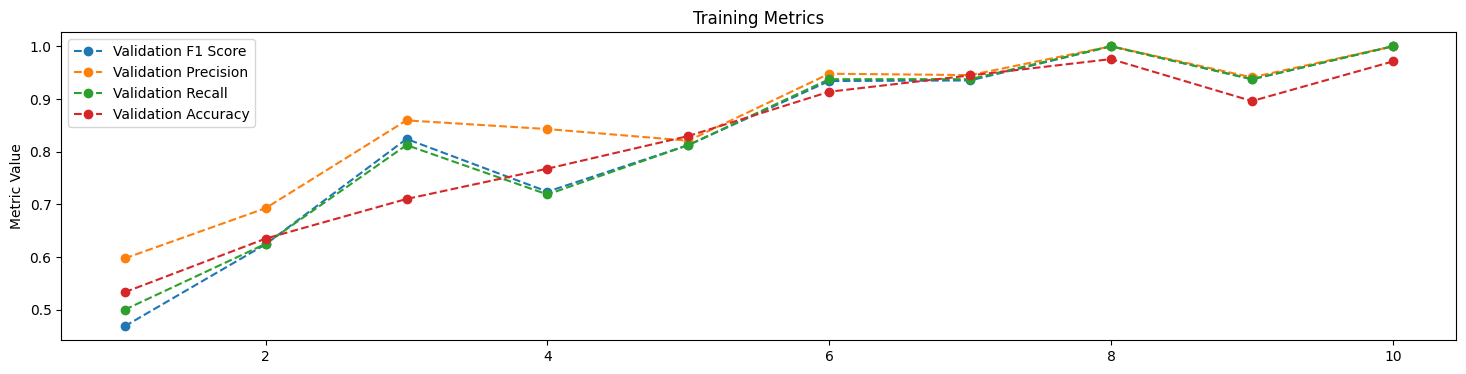

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

train_dataset_path = '/content/drive/MyDrive/Dataset/Train'
test_dataset_path = '/content/drive/MyDrive/Dataset/Test'

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

class MetricsCallback(keras.callbacks.Callback):
    def __init__(self, validation_generator):
        self.validation_generator = validation_generator
        self.val_f1_scores = []
        self.val_precisions = []
        self.val_recalls = []
        self.val_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        val_images, val_labels = self.validation_generator.next()
        val_preds = self.model.predict(val_images)
        val_preds = tf.argmax(val_preds, axis=1)
        val_true = tf.argmax(val_labels, axis=1)
        val_f1 = f1_score(val_true, val_preds, average='weighted')
        val_precision = precision_score(val_true, val_preds, average='weighted')
        val_recall = recall_score(val_true, val_preds, average='weighted')
        val_accuracy = logs['val_accuracy']  # Access accuracy from logs
        self.val_f1_scores.append(val_f1)
        self.val_precisions.append(val_precision)
        self.val_recalls.append(val_recall)
        self.val_accuracies.append(val_accuracy)
        print(f'Epoch {epoch + 1} - Val F1 Score: {val_f1:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, Accuracy: {val_accuracy:.4f}')

metrics_callback = MetricsCallback(validation_generator=test_generator)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[metrics_callback]
)

model.save('Model.h5')

plt.figure(figsize=(18, 4))
plt.plot(range(1, 11), metrics_callback.val_f1_scores, label='Validation F1 Score', linestyle='--', marker='o')
plt.plot(range(1, 11), metrics_callback.val_precisions, label='Validation Precision', linestyle='--', marker='o')
plt.plot(range(1, 11), metrics_callback.val_recalls, label='Validation Recall', linestyle='--', marker='o')
plt.plot(range(1, 11), metrics_callback.val_accuracies, label='Validation Accuracy', linestyle='--', marker='o')
plt.ylabel('Metric Value')
plt.title('Training Metrics')
plt.legend()
plt.savefig('Metrics.svg')
plt.show()


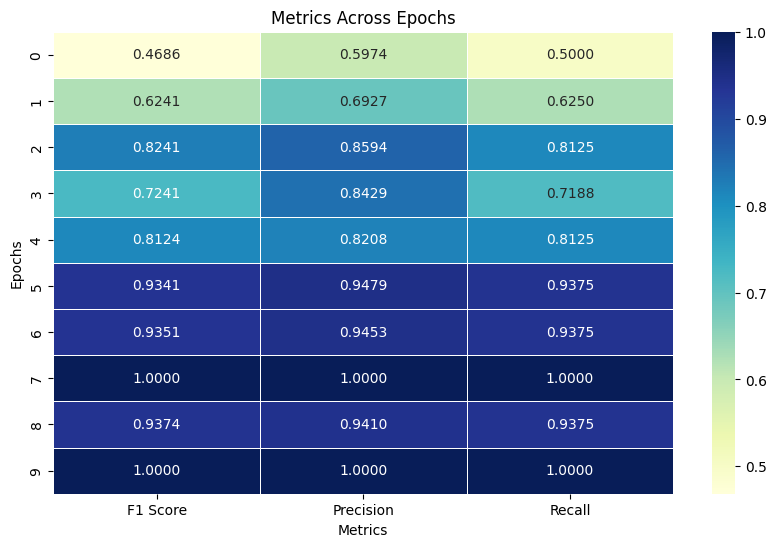

In [4]:
metrics_dict = {
    'F1 Score': metrics_callback.val_f1_scores,
    'Precision': metrics_callback.val_precisions,
    'Recall': metrics_callback.val_recalls
}

# Create a dataframe from the dictionary
import pandas as pd
metrics_df = pd.DataFrame(metrics_dict)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, fmt='.4f', cmap='YlGnBu', linewidths=0.5)
plt.title('Metrics Across Epochs')
plt.xlabel('Metrics')
plt.ylabel('Epochs')
plt.savefig('Metrics_Heatmap.svg')
plt.show()


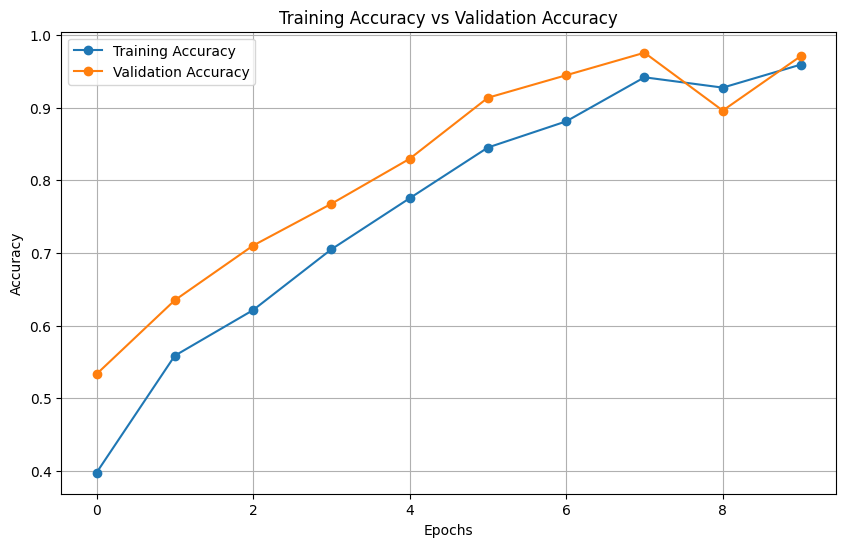

In [5]:
import matplotlib.pyplot as plt

# Plot training accuracy versus validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Save the plot as SVG
plt.savefig('Accuracy_Plot.svg', format='svg', bbox_inches='tight')
plt.show()


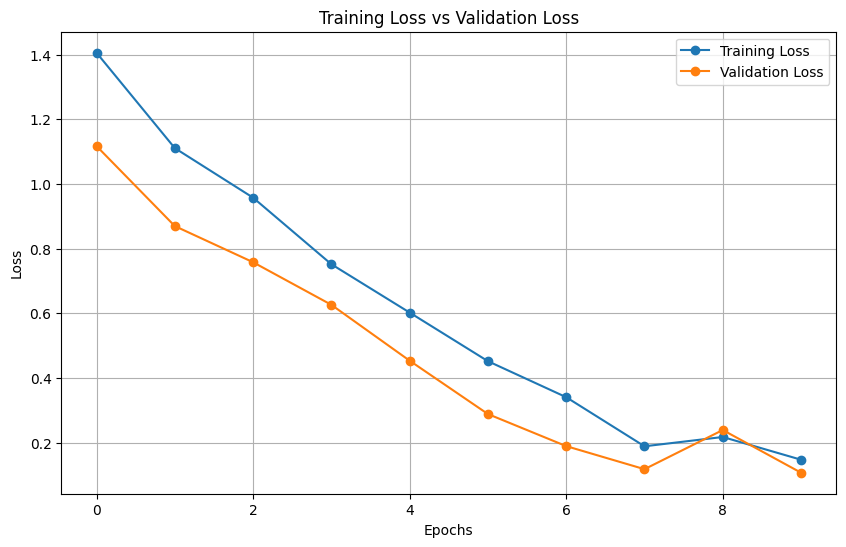

In [6]:
import matplotlib.pyplot as plt

# Plot training loss versus validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Save the plot as SVG
plt.savefig('Loss_Plot.svg', format='svg', bbox_inches='tight')
plt.show()


1/1 [==============================] - 1s 629ms/step


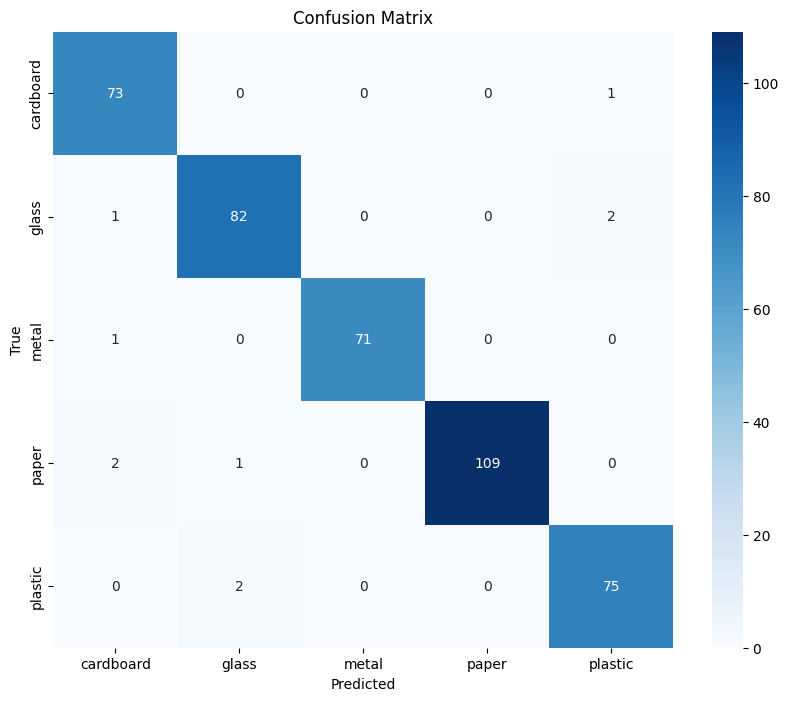

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the final predictions and true labels
final_val_preds = []
final_val_true = []

for _ in range(test_generator.samples // test_generator.batch_size):
    val_images, val_labels = test_generator.next()
    val_preds = model.predict(val_images)
    val_preds = np.argmax(val_preds, axis=1)
    val_true = np.argmax(val_labels, axis=1)
    final_val_preds.extend(val_preds)
    final_val_true.extend(val_true)

# Generate confusion matrix
cm = confusion_matrix(final_val_true, final_val_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('Confusion_Matrix.svg', format='svg', bbox_inches='tight')
plt.show()
